# Assignment8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [4]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [5]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Price', ylabel='Mileage'>

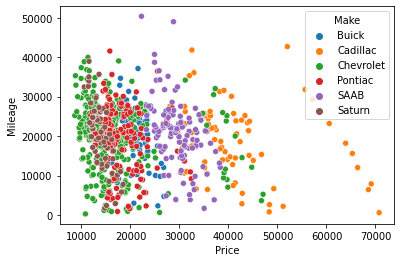

In [6]:
sns.scatterplot(data=df, x='Price', y='Mileage', hue='Make')

In [7]:
corr=df[['Price','Mileage']].corr()
corr

,Price,Mileage
Price,1.000000,-0.143051
Mileage,-0.143051,1.000000


<AxesSubplot:xlabel='transformed'>

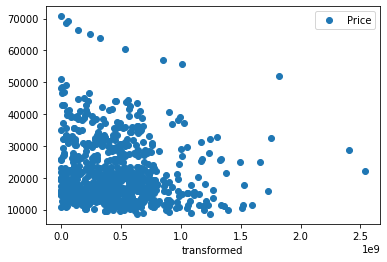

In [8]:
df['transformed']=np.power((df['Mileage']),2)
df.plot(x='transformed',y='Price',style='o')

In [9]:
corr=df[['transformed','Mileage']].corr()
corr

,transformed,Mileage
transformed,1.000000,0.954664
Mileage,0.954664,1.000000


<AxesSubplot:xlabel='transformed', ylabel='Mileage'>

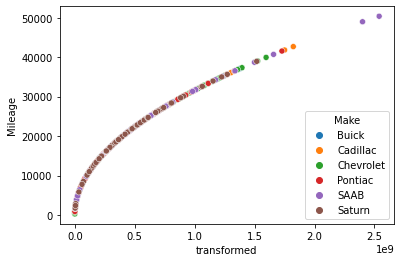

In [10]:
sns.scatterplot(data=df, x='transformed', y='Mileage', hue='Make')

In [11]:
df['squareprice']=np.power((df['Mileage']),2)

In [12]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,transformed,squareprice
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,67584841,67584841
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,83448225,83448225
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,174134416,174134416
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,267060964,267060964
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,393308224,393308224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,263380441,263380441
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,364619025,364619025
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,419594256,419594256
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,674908441,674908441


In [13]:
X=df['squareprice'].values
y=df['Mileage'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=regressor.predict(X_test)
pd.DataFrame({'actual Mileage':y_test,'predicted Mileage':y_pred}).head(10)

,actual Mileage,predicted Mileage
0,19569,17998.539147
1,28354,27783.254291
2,27015,26060.157472
3,12090,12495.493062
4,22105,20454.813425
5,28385,27824.133811
6,8967,10967.114614
7,21418,19759.888348
8,22576,20943.923057
9,26252,25115.563435


In [16]:
from sklearn import metrics
print(metrics.r2_score(y_test,y_pred)) 

0.9220751584779556


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        804 non-null    float64
 1   Mileage      804 non-null    int64  
 2   Make         804 non-null    object 
 3   Model        804 non-null    object 
 4   Trim         804 non-null    object 
 5   Type         804 non-null    object 
 6   Cylinder     804 non-null    int64  
 7   Liter        804 non-null    float64
 8   Doors        804 non-null    int64  
 9   Cruise       804 non-null    int64  
 10  Sound        804 non-null    int64  
 11  Leather      804 non-null    int64  
 12  transformed  804 non-null    int64  
 13  squareprice  804 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 88.1+ KB


<AxesSubplot:xlabel='Cylinder'>

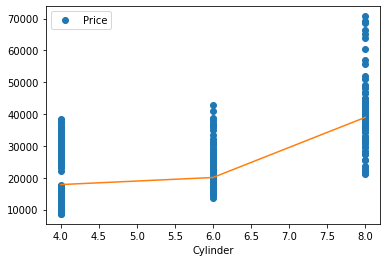

In [18]:
df.plot(x='Cylinder',y='Price',style='o')
df.groupby('Cylinder')['Price'].mean().plot()

In [19]:
df['transCylinder']=np.power((df['Price']),2)

<AxesSubplot:xlabel='transCylinder'>

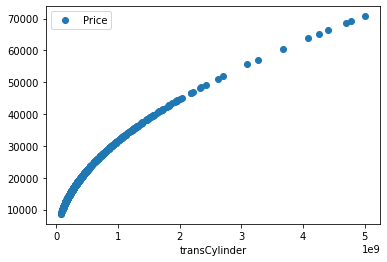

In [20]:
df.plot(x='transCylinder',y='Price',style='o')

In [21]:
df[['transCylinder','squareprice']].corr()

,transCylinder,squareprice
transCylinder,1.000000,-0.109281
squareprice,-0.109281,1.000000


<AxesSubplot:xlabel='Liter'>

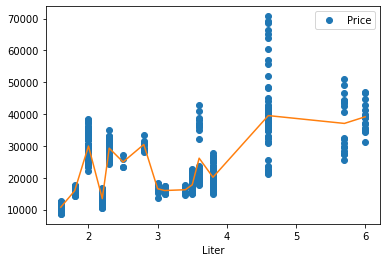

In [22]:
df.plot(x='Liter',y='Price',style='o')
df.groupby('Liter')['Price'].mean().plot()

In [23]:
df['transLiter']=np.power((df['Price']),2)

<AxesSubplot:xlabel='transLiter'>

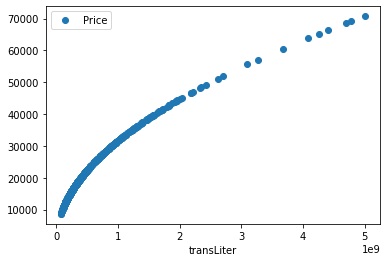

In [24]:
df.plot(x='transLiter',y='Price',style='o')

In [25]:
df[['transLiter','Price']].corr()

,transLiter,Price
transLiter,1.000000,0.962118
Price,0.962118,1.000000


<AxesSubplot:xlabel='Doors'>

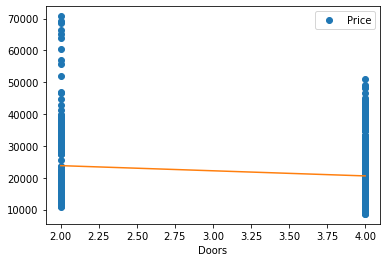

In [26]:
df.plot(x='Doors',y='Price',style='o')
df.groupby('Doors')['Price'].mean().plot()

In [27]:
df[['Doors','Price']].corr()

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


<AxesSubplot:xlabel='Price', ylabel='Mileage'>

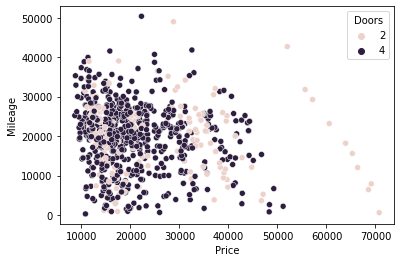

In [28]:
sns.scatterplot(data=df, x='Price', y='Mileage', hue='Doors')

<AxesSubplot:xlabel='Cruise'>

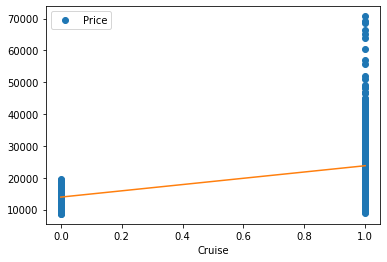

In [29]:
df.plot(x='Cruise',y='Price',style='o')
df.groupby('Cruise')['Price'].mean().plot()

In [30]:
df[['Cruise','Price']].corr()

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


<AxesSubplot:xlabel='Sound'>

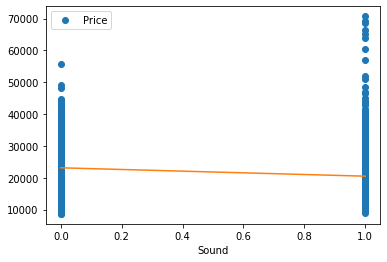

In [31]:
df.plot(x='Sound',y='Price',style='o')
df.groupby('Sound')['Price'].mean().plot()

In [32]:
df[['Sound','squareprice']].corr()

,Sound,squareprice
Sound,1.00000,-0.01747
squareprice,-0.01747,1.00000


<AxesSubplot:xlabel='Leather'>

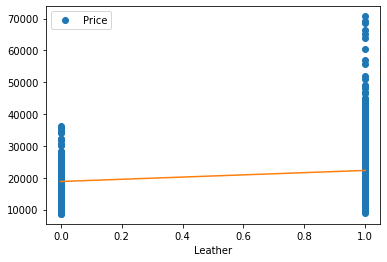

In [33]:
df.plot(x='Leather',y='Price',style='o')
df.groupby('Leather')['Price'].mean().plot()

In [34]:
df[['Leather','Price']].corr()

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [35]:
X=df[['transCylinder','transLiter','Mileage','Doors','Cruise','Sound', 'Leather']].values
y=df['Price'].values

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

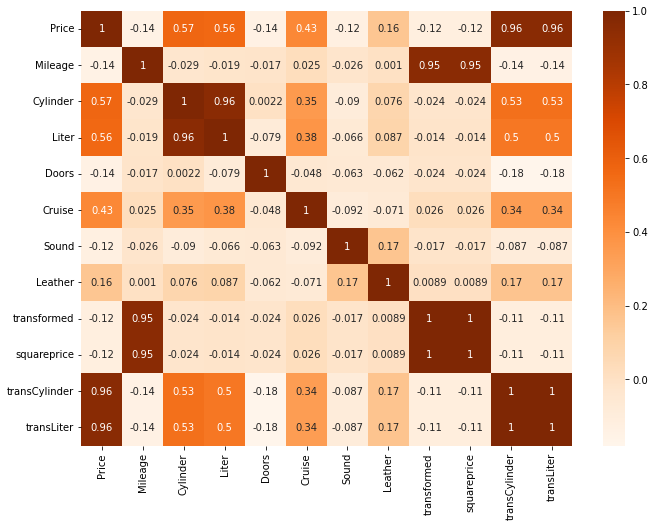

In [37]:
from matplotlib import pyplot as plt
corr=df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Oranges",annot=True)
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(X_train,y_train)
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [39]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred=regressor.predict(X_test)
pd.DataFrame({'actual Price':y_test,'predicted Salary':y_pred})

,actual Price,predicted Salary
0,39365.883238,36376.628297
1,26190.271468,24985.348063
2,15295.018267,17059.972743
3,13174.071009,14698.531107
4,14869.282067,16744.745335
...,...,...
156,19105.130124,19634.809666
157,14061.122765,14442.194478
158,33358.767771,29637.878388
159,21799.172097,21281.750641


In [41]:
from sklearn import metrics
print(metrics.r2_score(y_test,y_pred)) 

0.9368726795007416
